In [15]:
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from db_scripts.main_db_script import db_filename
from hr_db_scripts.main_db_script import get_db_table_as_df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = get_db_table_as_df('for_model_avgs', dbfilename=db_filename)

In [3]:
print df.shape
df = df[df.rd>0.01]
df.shape

(2172, 20)


(818, 20)

In [4]:
out_col = 'num_flooded'
in_cols = [a for a in df.columns if a not in ['event_date', 'event_name', out_col]]

In [5]:
df[in_cols]
df = df[pd.isnull(df[in_cols]).sum(1)==0]
df.shape

(812, 20)

In [6]:
reg = RandomForestRegressor(oob_score=True, n_estimators=1000, max_features=0.33)
reg.fit(df[in_cols], df[out_col])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.33, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [7]:
preds = reg.predict(df[in_cols])
print r2_score(df.num_flooded, preds)
print mean_absolute_error(df.num_flooded, preds)
print mean_squared_error(df.num_flooded, preds)

0.979657518884
0.291208128079
2.21649504557


(0, 166.95000000000002)

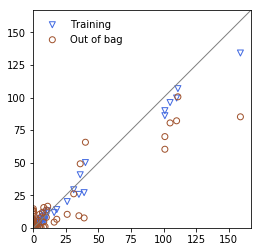

In [8]:
maxval = df[out_col].max()
fig, ax = plt.subplots(1)
ax.plot([0,180], [0,180], c='gray', lw=1)
ax.scatter(df.num_flooded, preds, facecolors='none', edgecolors='royalblue', marker='v', label='Training')
ax.scatter(df.num_flooded, reg.oob_prediction_, marker='o', facecolors='none', edgecolors='sienna', label='Out of bag')
ax.legend(frameon=False)
ax.set_aspect('equal', adjustable='box-forced')
ax.set_xticks(np.arange(0, maxval*2, 25))
ax.set_yticks(np.arange(0, maxval*2, 25))
ax.set_xlim((0, maxval*1.05))
ax.set_ylim((0, maxval*1.05))

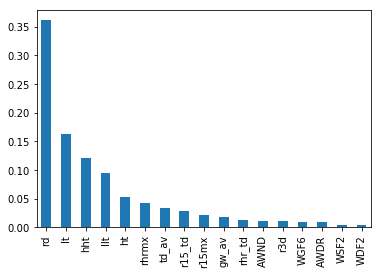

In [9]:
pd.Series(data=reg.feature_importances_, index=in_cols).sort_values(ascending=False).plot.bar()

In [10]:
print r2_score(df.num_flooded, reg.oob_prediction_)
print mean_absolute_error(df.num_flooded, reg.oob_prediction_)
print mean_squared_error(df.num_flooded, reg.oob_prediction_)

0.840082167515
0.799685740748
17.4244764632


## Cross validation

In [13]:
models = [SVR(), 
          RandomForestRegressor(oob_score=True, n_estimators=1000, max_features=0.33), 
          MLPRegressor()
         ]

In [28]:
for m in models:
    scores = cross_val_score(m, df[in_cols], df[out_col], n_jobs=-1, cv=10, scoring='mean_squared_error')
    scores1 = cross_val_score(m, df[in_cols], df[out_col], n_jobs=-1, cv=10, scoring='mean_absolute_error')
    print m
    print abs(scores.mean())**0.5
    print abs(scores1.mean())
    print scores

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
10.4678980782
1.42124544109
[ -1.09554878e+03  -2.56119198e-02  -2.38188368e-02  -2.27812339e-02
  -2.26288871e-02  -2.54702612e-02  -2.73497557e-02  -2.37643856e-02
  -2.45360564e-02  -2.41599213e-02]
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.33, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)
10.5418361655
1.58430688046
[ -1.09554878e+03  -3.32721329e-01  -2.42226812e+00  -2.63988028e+00
  -3.21876879e+00  -8.36591741e-01  -6.63472407e-01  -2.44293121e+00
  -2.66912793e+00  -5.28555111e-01]
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.9

In [82]:
df[out_col]

0       101.0
1         2.0
2       110.0
3       105.0
4        36.0
5        35.0
6         1.0
7         5.0
8         8.0
9         2.0
10       39.0
11       18.0
12        1.0
13        5.0
14       31.0
15        3.0
16        1.0
17        2.0
18        1.0
19        4.0
20       10.0
21        7.0
22       10.0
23        1.0
25       16.0
26      159.0
27        1.0
28        3.0
29        6.0
30       26.0
        ...  
2082      0.0
2084      0.0
2085      0.0
2086      0.0
2087      0.0
2089      0.0
2090      0.0
2091      0.0
2094      0.0
2097      0.0
2098      0.0
2099      0.0
2100      0.0
2110      0.0
2111      0.0
2112      0.0
2115      0.0
2118      0.0
2119      0.0
2125      0.0
2129      0.0
2131      0.0
2142      0.0
2146      0.0
2161      0.0
2162      0.0
2163      0.0
2165      0.0
2166      0.0
2168      0.0
Name: num_flooded, Length: 812, dtype: float64

In [92]:
df[out_col].sort_values(ascending=False)[:10]

26    159.0
43    111.0
2     110.0
3     105.0
0     101.0
42    101.0
40     40.0
10     39.0
4      36.0
5      35.0
Name: num_flooded, dtype: float64

In [159]:
bins = np.linspace(0, 100, 4)

In [160]:
bins

array([   0.        ,   33.33333333,   66.66666667,  100.        ])

In [161]:
y_binned = np.digitize(df[out_col], bins)

In [162]:
pd.Series(y_binned, dtype='category').value_counts()

1    802
4      6
2      4
dtype: int64

In [156]:
x_train, x_test, y_train, y_test = train_test_split(df[in_cols], df[out_col], stratify = y_binned, test_size = 0.3)

In [157]:
y_train

40       40.0
494       0.0
2131      0.0
1634      0.0
17        2.0
707       0.0
393       0.0
2050      0.0
1311      0.0
401       0.0
416       0.0
1094      0.0
1338      0.0
1832      0.0
236       0.0
0       101.0
464       0.0
22       10.0
1789      0.0
379       0.0
259       0.0
337       0.0
1500      0.0
91        0.0
410       0.0
1015      0.0
718       0.0
1235      0.0
1563      0.0
5        35.0
        ...  
604       0.0
246       0.0
887       0.0
873       0.0
1660      0.0
1857      0.0
1878      0.0
451       0.0
1226      0.0
202       0.0
875       0.0
1448      0.0
1482      0.0
1145      0.0
562       0.0
2111      0.0
1889      0.0
1146      0.0
690       0.0
2044      0.0
2087      0.0
42      101.0
685       0.0
1151      0.0
517       0.0
1684      0.0
84        0.0
203       0.0
1664      0.0
309       0.0
Name: num_flooded, Length: 568, dtype: float64

In [158]:
y_test

2110      0.0
1647      0.0
2089      0.0
591       0.0
918       0.0
2057      0.0
1489      0.0
645       0.0
1100      0.0
352       0.0
1756      0.0
2077      0.0
1086      0.0
1820      0.0
1179      0.0
26      159.0
2021      0.0
1535      0.0
411       0.0
2004      0.0
1049      0.0
1757      0.0
656       0.0
82        0.0
1219      0.0
789       0.0
1629      0.0
736       0.0
2028      0.0
1355      0.0
        ...  
31        5.0
121       0.0
1638      0.0
1217      0.0
2058      0.0
30       26.0
1750      0.0
1679      0.0
12        1.0
682       0.0
1190      0.0
992       0.0
717       0.0
639       0.0
1971      0.0
2005      0.0
315       0.0
1430      0.0
936       0.0
55        0.0
1822      0.0
1493      0.0
372       0.0
2027      0.0
581       0.0
158       0.0
241       0.0
1113      0.0
1499      0.0
245       0.0
Name: num_flooded, Length: 244, dtype: float64